# División de los mecanizados de cada una de las herramientas, normalización y división de las etapas

### Importamos las librerías

In [1]:
from File2PandasTable import File2PandasTable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funciones_mecanizados import separar_mecanizados
from funciones_mecanizados import normalizar
from funciones_mecanizados import cortar
%matplotlib inline

import pandas as pd
import importlib
import copy

pd.options.display.float_format = "{:.3f}".format

### Cargamos los datos

In [2]:
data_H1_file = 'data/panel1_H1.TXT'
data_H2_file = 'data/panel2_H2.TXT'
data_H3_file = 'data/panel1_H3.TXT'


h1 = File2PandasTable(data_H1_file) # Broca muy usada
h2 = File2PandasTable(data_H2_file) # Broca usada
h3 = File2PandasTable(data_H3_file) # Broca nueva


print('h1:', h1.shape)
print('h2:', h2.shape)
print('h3:', h3.shape)

h1: (18070, 20)
h2: (8308, 20)
h3: (7635, 20)


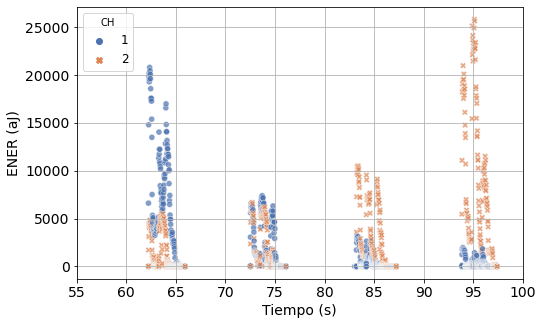

In [3]:
# Plot dataset
plt.figure(figsize=(8,5))
var = 'ENER'
data = h3

sns.scatterplot(data=data, x='Tiempo', y=var, hue='CH', palette='deep', style="CH", alpha=0.7)

plt.legend(title='CH', loc=2, fontsize=12)
plt.ylabel('ENER (aJ)',fontsize=14)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([55, 100])
plt.grid('True')

## Dividimos los mecanizados

In [4]:
data_h1 = separar_mecanizados(h1)
data_h2 = separar_mecanizados(h2)
data_h3 = separar_mecanizados(h3)

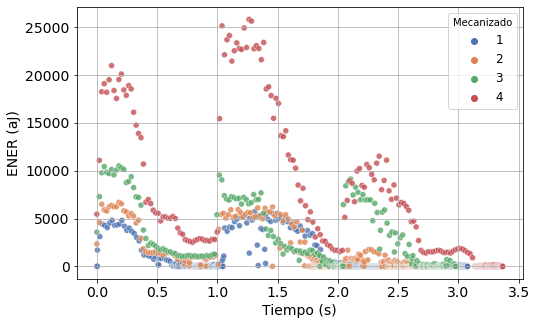

In [5]:
#Plot dataset separado por mecanizados
plt.figure(figsize=(8,5))
var = 'ENER'
ch = 2
data=data_h3

sns.scatterplot(data=data[data['CH']==ch], x='Tiempo', y=var, hue='Mecanizado', palette='deep', alpha=0.8)
plt.legend(title='Mecanizado', loc=1, fontsize=12)
plt.ylabel('ENER (aJ)',fontsize=14)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid('True')

In [6]:
# Elminamos las columnas que no vamos a usar.
data_h1.drop(['PARA1','ID','THR'], axis=1, inplace=True)
data_h2.drop(['PARA1','ID','THR'], axis=1, inplace=True)
data_h3.drop(['PARA1','ID','THR'], axis=1, inplace=True)


# Agregamos una etiqueta indicando la condición de la broca
data_h1['Herramienta'] = 'H1'
data_h2['Herramienta'] = 'H2'
data_h3['Herramienta'] = 'H3'


In [7]:
print(data_h1.shape[0])
print(data_h2.shape[0])
print(data_h3.shape[0])
total = data_h1.shape[0] + data_h2.shape[0] + data_h3.shape[0]
print('Total:',total)

8532
5947
5864
Total: 20343


In [8]:
#Elminamos las muestras con energía nula
data_h1.replace(0,np.nan, inplace=True)
data_h2.replace(0,np.nan, inplace=True)
data_h3.replace(0,np.nan, inplace=True)

In [9]:
#Cantidad de filas que tienen alguna variable en 0
print('H1:',data_h1.isnull().any(axis=1).sum())
print('H2:',data_h2.isnull().any(axis=1).sum())
print('H3:',data_h3.isnull().any(axis=1).sum())
total_zeros = data_h1.isnull().any(axis=1).sum() + data_h2.isnull().any(axis=1).sum() + data_h3.isnull().any(axis=1).sum()
print('Total:',total_zeros)

H1: 5424
H2: 3037
H3: 2868
Total: 11329


In [10]:
data_h1 = data_h1.dropna(axis=0)
data_h2 = data_h2.dropna(axis=0)
data_h3 = data_h3.dropna(axis=0)

In [11]:
print('Procetanje de datos eliminados:',round(total_zeros/total,3)*100,'%')

Procetanje de datos eliminados: 55.7 %


In [12]:
print(data_h1.shape[0])
print(data_h2.shape[0])
print(data_h3.shape[0])
print('Total:',data_h1.shape[0]+ data_h2.shape[0] + data_h3.shape[0] )

3108
2910
2996
Total: 9014


In [13]:
#Agregamos Potencia Marse
data_h1['P_MARSE'] = data_h1['ENER'] / data_h1['DURATION']
data_h2['P_MARSE'] = data_h2['ENER'] / data_h2['DURATION']
data_h3['P_MARSE'] = data_h3['ENER'] / data_h3['DURATION']

C:\Users\agust\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
data_h1

,P_FRQ,Mecanizado,Tiempo,CH,RISE,COUN,ENER,DURATION,AMP,A_FRQ,RMS,ASL,PCNTS,R_FRQ,I_FRQ,SIG_STRNGTH,ABS_ENERGY,C_FRQ,Herramienta,P_MARSE
22,92,1,0.002,1,213.000,26,10.000,383.000,61,68.000,0.002,31,15,65.000,70.000,105225.000,5462.000,405,H1,0.026
23,92,1,0.003,1,13340.000,1763,1750.000,20000.000,71,88.000,0.010,44,1160,90.000,86.000,10962000.000,1041000.000,367,H1,0.087
24,102,1,0.020,2,17944.000,2916,5140.000,20000.000,80,146.000,0.042,55,2596,155.000,144.000,32165000.000,8673000.000,244,H1,0.257
25,92,1,0.023,1,17907.000,1895,2470.000,20000.000,75,95.000,0.020,49,1696,95.000,94.000,15432000.000,2075000.000,307,H1,0.123
26,102,1,0.041,2,14945.000,3411,8520.000,20000.000,85,171.000,0.076,60,2494,181.000,166.000,53275000.000,23501000.000,322,H1,0.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,92,4,3.076,1,2407.000,139,80.000,2542.000,61,55.000,0.062,58,126,96.000,52.000,501572.000,18989.000,476,H1,0.031
8874,92,4,3.079,1,246.000,43,20.000,842.000,57,51.000,0.062,58,13,50.000,52.000,152592.000,4906.000,465,H1,0.024
8876,92,4,3.080,1,223.000,191,90.000,2354.000,63,81.000,0.062,58,30,75.000,134.000,590419.000,27120.000,320,H1,0.038
8879,97,4,3.084,1,406.000,42,20.000,757.000,56,55.000,0.058,58,20,62.000,49.000,140636.000,4653.000,482,H1,0.026


In [15]:
#Normalizamos

columnas = ['RMS','AMP','ENER','P_FRQ','PCNTS','C_FRQ', 'I_FRQ','A_FRQ',
            'R_FRQ','DURATION','ASL','COUN','ABS_ENERGY', 'SIG_STRNGTH','RISE', 'P_MARSE']
metodo = 'MinMaxScaler'
h1_norm = normalizar(data_h1, columnas, metodo)
h2_norm = normalizar(data_h2, columnas, metodo)
h3_norm = normalizar(data_h3, columnas, metodo)

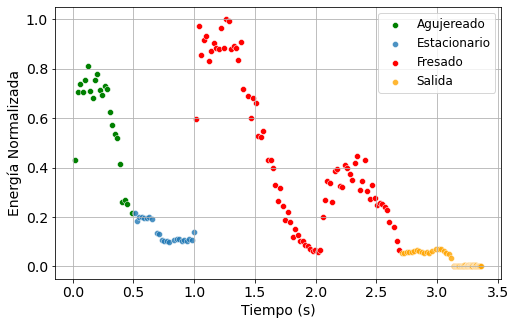

In [16]:
#Plot dataset separado por mecanizados

plt.figure(figsize=(8,5))
var = 'ENER'
ch = 2
data=h3_norm[h3_norm['Mecanizado']==4]


sns.scatterplot(data=data[(data['CH']==ch) & (data['Tiempo']<0.5)],
                x='Tiempo', y=var, palette='deep', alpha=1,color='g', label='Agujereado')

sns.scatterplot(data=data[(data['CH']==ch) & (data['Tiempo']>0.5) & 
                          (data['Tiempo']<1)], 
                          x='Tiempo', y=var, palette='deep', alpha=0.8, label='Estacionario')

sns.scatterplot(data=data[(data['CH']==ch) & (data['Tiempo']<2.7) &(data['Tiempo']>1)],
                x='Tiempo', y=var, palette='deep', alpha=1,color='r', label='Fresado')

sns.scatterplot(data=data[(data['CH']==ch) & (data['Tiempo']>2.7)], 
                          x='Tiempo', y=var, palette='deep', alpha=0.8, label='Salida',color='orange')

plt.legend(loc=1, fontsize=12)
plt.ylabel('Energía Normalizada',fontsize=14)
plt.xlabel('Tiempo (s)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid('True')

In [17]:
print(h1_norm.shape[0])
print(h2_norm.shape[0])
print(h3_norm.shape[0])

3108
2910
2996


### Cantidad de muestras por Etapa

In [18]:
def etiquetar_etapas(data):
    data.assign(Etapa=0)
    data['Etapa']= np.where(data.Tiempo<=0.5, 'Agujereado', 
    np.where((data.Tiempo>0.5) & (data.Tiempo<1), 'Estacionario', 
    np.where((data.Tiempo>=1.0) & (data.Tiempo<2.7), 'Fresado',
    np.where(data.Tiempo>=2.7, 'Salida',1))))
    return data

In [19]:
h1_norm = etiquetar_etapas(h1_norm)
h2_norm = etiquetar_etapas(h2_norm)
h3_norm = etiquetar_etapas(h3_norm)

cont_etapas = pd.DataFrame(columns=['Agujereado','Estacionario', 'Fresado', 'Salida'], index=['H1','H2','H3','Total'])
cont_etapas.iloc[0]= h1_norm['Etapa'].value_counts()
cont_etapas.iloc[1]= h2_norm['Etapa'].value_counts()
cont_etapas.iloc[2]= h3_norm['Etapa'].value_counts()
cont_etapas.iloc[3] = cont_etapas.sum(axis=0).astype(int)
cont_etapas

,Agujereado,Estacionario,Fresado,Salida
H1,257,442,1603,806
H2,214,623,1813,260
H3,241,658,1631,466
Total,712,1723,5047,1532


### Exportamos los DataFrames a archivos CSV

In [20]:
#Sin normalizar
h1.to_csv(r'data/panel1_H1.csv', index=False)
h2.to_csv(r'data/panel2_H2.csv', index=False)
h3.to_csv(r'data/panel1_H3.csv', index=False)

In [21]:
# Separados
h1_norm.to_csv(r'data/panel1_H1_norm.csv', index=False)
h2_norm.to_csv(r'data/panel2_H2_norm.csv', index=False)
h3_norm.to_csv(r'data/panel1_H3_norm.csv', index=False)

In [22]:
# Juntos
H = pd.concat([h1_norm, h2_norm, h3_norm])
H.reset_index(drop=True, inplace=True)
H.to_csv(r'data/H_norm.csv', index=False)

### Variables relevantes y correlación

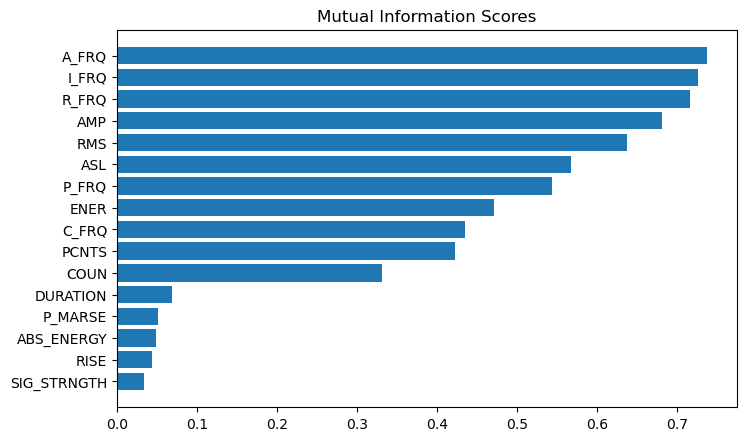

In [25]:
# Prueba Mutual information
from sklearn.feature_selection import mutual_info_classif
X = H.copy()
X.drop(['CH', 'Mecanizado', 'Tiempo','Etapa'], axis=1, inplace=True)
y = X.pop('Herramienta')
cols = ['RMS','AMP','ENER','P_FRQ','PCNTS','C_FRQ', 'I_FRQ','A_FRQ',
        'R_FRQ','DURATION','ASL','COUN','ABS_ENERGY', 'SIG_STRNGTH','RISE', 'P_MARSE']

def make_mi_scores(X, y, cols):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, cols)
mi_scores[::3] 

def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_utility_scores(mi_scores)

<AxesSubplot:title={'center':'Correlación lineal entre variables'}>

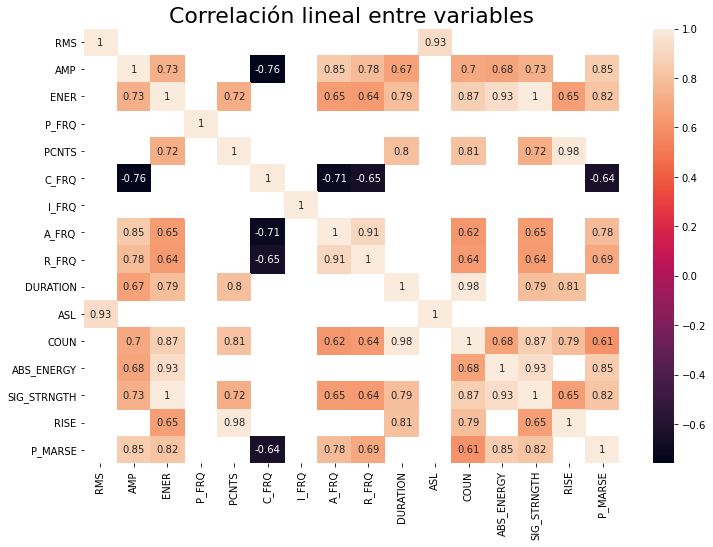

In [31]:
plt.figure(figsize=(12,8))

plt.title('Correlación lineal entre variables',size=22)
corr_h = H[cols].corr()
sns.heatmap(corr_h[abs(corr_h)>0.60], annot=True)